In [78]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, accuracy_score


In [68]:
df = pd.read_parquet("../data/btcusd_ready.parquet")


In [69]:
df.dropna(inplace=True)

In [70]:
df = df[150000:]

In [71]:
split = int(len(df) * 0.6)
train = df.iloc[:split]
rest = df.iloc[split:]

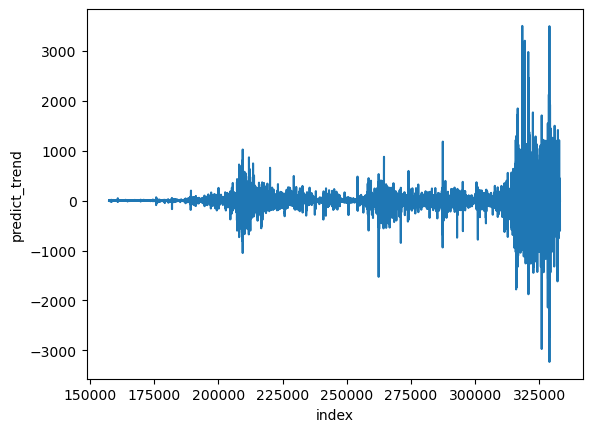

In [72]:
train_reset = train.reset_index()
sns.lineplot(data=train_reset, x='index', y='predict_trend')
plt.show()

In [73]:
split_rest = int(len(rest) * 0.5)
validation = rest.iloc[:split_rest]
test = rest.iloc[split_rest:]

In [74]:
train_y = train[['predict_trend']]
train_x = train.drop(columns=['predict_trend'])
val_y = validation[['predict_trend']]
val_x = validation.drop(columns=['predict_trend'])
test_y = test[['predict_trend']]
test_x = test.drop(columns=['predict_trend'])

In [75]:
# model = Sequential([
#     Dense(256, activation='relu', input_shape=(train_x.shape[1],)),
#     Dense(128, activation='relu', input_shape=(train_x.shape[1],)),
#     # Dropout(0.2),
#     Dense(64, activation='relu'),
#     # Dropout(0.2),
#     Dense(32, activation='relu'),
#     # Dropout(0.2),
#     Dense(16, activation='relu'),
#     Dense(1)
# ])

# model.compile(optimizer='adam', loss='mse')


In [115]:
# Define the model with optimized parameters
model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.03,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42
)


# Train the model with early stopping
model.fit(
    train_x,
    train_y,
    eval_set=[(val_x, val_y)],
)

# Make predictions on the test set
y_pred = model.predict(test_x)

# Evaluate performance using MSE and Directional Accuracy
mse = mean_squared_error(test_y, y_pred)
directional_accuracy = np.mean(np.sign(y_pred) == np.sign(test_y))

print(f'Mean Squared Error: {mse}')
print(f'Directional Accuracy: {directional_accuracy}')

# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(test_y.values[:100], label='Actual', alpha=0.7)
plt.plot(y_pred[:100], label='Predicted', alpha=0.7)
plt.title('Predictions vs Actual Values')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

[0]	validation_0-rmse:161.12565
[1]	validation_0-rmse:161.10465
[2]	validation_0-rmse:161.11002
[3]	validation_0-rmse:161.12049
[4]	validation_0-rmse:161.12435
[5]	validation_0-rmse:161.12855
[6]	validation_0-rmse:161.11693
[7]	validation_0-rmse:161.11233
[8]	validation_0-rmse:161.11708
[9]	validation_0-rmse:161.13362
[10]	validation_0-rmse:161.15036
[11]	validation_0-rmse:161.15551
[12]	validation_0-rmse:161.17691
[13]	validation_0-rmse:161.19026
[14]	validation_0-rmse:161.20811
[15]	validation_0-rmse:161.21094
[16]	validation_0-rmse:161.21283
[17]	validation_0-rmse:161.22128
[18]	validation_0-rmse:161.25689
[19]	validation_0-rmse:161.27687
[20]	validation_0-rmse:161.29095
[21]	validation_0-rmse:161.31498
[22]	validation_0-rmse:161.32018
[23]	validation_0-rmse:161.34427
[24]	validation_0-rmse:161.37061
[25]	validation_0-rmse:161.40988
[26]	validation_0-rmse:161.43965
[27]	validation_0-rmse:161.47362
[28]	validation_0-rmse:161.51636
[29]	validation_0-rmse:161.52640
[30]	validation_0-rm

Traceback (most recent call last):
  File "/opt/anaconda3/envs/Universal/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/gn/mtbdxhjn1697bp_qhyd6y0cr0000gn/T/ipykernel_65396/4263595482.py", line 26, in <module>
    directional_accuracy = np.mean(np.sign(y_pred) == np.sign(test_y))
  File "/opt/anaconda3/envs/Universal/lib/python3.9/site-packages/pandas/core/generic.py", line 2171, in __array_ufunc__
    return arraylike.array_ufunc(self, ufunc, method, *inputs, **kwargs)
  File "/opt/anaconda3/envs/Universal/lib/python3.9/site-packages/pandas/core/arraylike.py", line 276, in array_ufunc
    result = maybe_dispatch_ufunc_to_dunder_op(self, ufunc, method, *inputs, **kwargs)
  File "ops_dispatch.pyx", line 113, in pandas._libs.ops_dispatch.maybe_dispatch_ufunc_to_dunder_op
  File "/opt/anaconda3/envs/Universal/lib/python3.9/site-packages/pandas/core/ops/common.py", line 76, in n

Mean Squared Error: 56631.9375


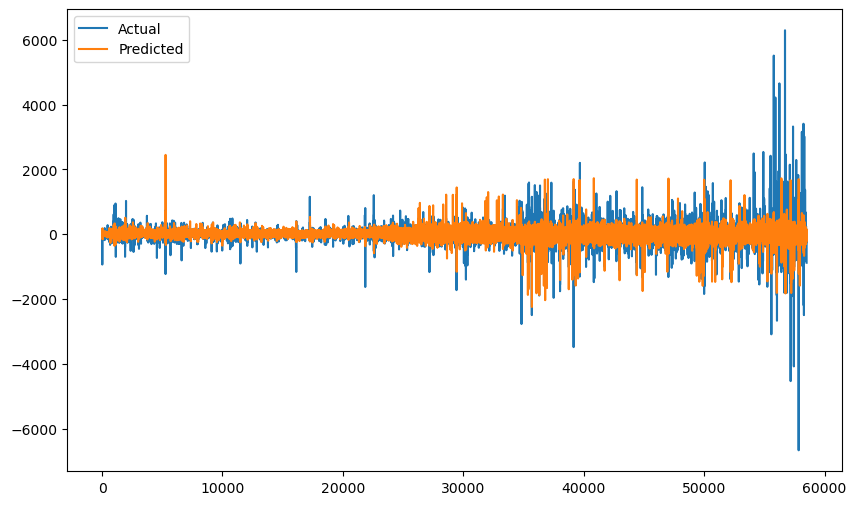

In [90]:
model = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=12, random_state=42)

# Train the model
model.fit(train_x, train_y)

# Make predictions
y_pred = model.predict(test_x)

# Evaluate the model
mse = mean_squared_error(test_y, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the predictions vs actual values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(test_y.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [111]:
threshold = 150

# Convert predictions and actual values to binary using the threshold
y_pred_binary = np.where(y_pred > threshold, 1, np.where(y_pred < -threshold, -1, 0))
y_test_binary = np.where(test_y > threshold, 1, np.where(test_y < -threshold, -1, 0))
# Calculate accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7423258357831408


In [112]:
y_test_binary_mod = y_test_binary%2
print(y_test_binary_mod.sum()/len(y_test_binary) * 100)

20.094687905927394


In [77]:
model.fit(train_x, train_y, epochs=100, validation_data=(val_x, val_y), verbose=2)

TypeError: fit() got an unexpected keyword argument 'epochs'